### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
print(data.info())
print(data.isna().sum().sort_values(ascending=False))
#print("Car\n====\n")
#print(data['car'].value_counts(dropna=False))
nacols = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
nadata = data[data[nacols].isna().any(axis=1)]
print (nadata)
print("Bar\n====")
print(data['Bar'].value_counts(dropna=False))
print("CoffeeHouse\n====")
print(data['CoffeeHouse'].value_counts(dropna=False))
print("CarryAway\n====")
print(data['CarryAway'].value_counts(dropna=False))
print("RestaurantLessThan20\n====")
print(data['RestaurantLessThan20'].value_counts(dropna=False))
print("Restaurant20To50\n====")
print(data['Restaurant20To50'].value_counts(dropna=False))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
# drop the car column
data = data.drop(columns=['car'])

#fix the typo in the column name
data = data.rename(columns={'passanger':'passenger'})

#default the others to 0 when there wasn't a response. There were not a ton of these
#(5% of the total responses had one more more invalid values in one of these columns)
data[nacols] = data[nacols].fillna('never')
data.isna().sum().sort_values(ascending=False)

destination             0
passenger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon?



In [6]:
data['Y'].value_counts(normalize=True)

Y
1    0.568433
0    0.431567
Name: proportion, dtype: float64

5. Use a bar plot to visualize the `coupon` column.

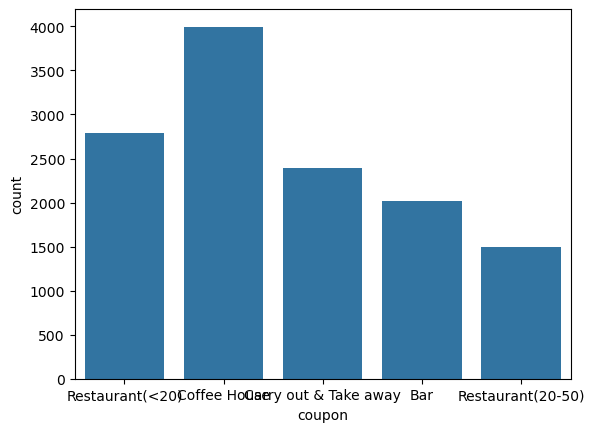

In [7]:
#data['coupon'].value_counts().plot(kind='bar')
sns.countplot(data=data, x='coupon')
plt.show()

6. Use a histogram to visualize the temperature column.

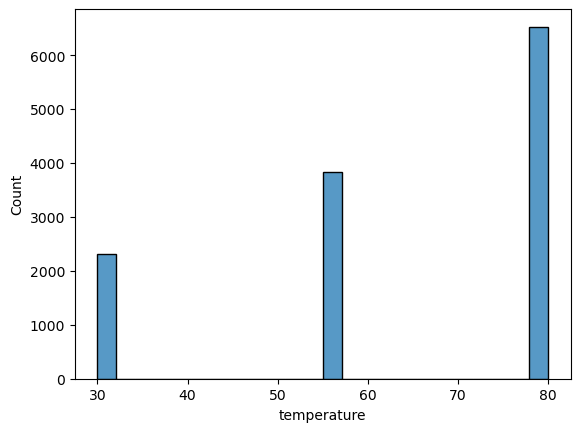

In [8]:
sns.histplot(data=data, x='temperature')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [9]:
bardf = data[data['coupon']=='Bar'].copy()

2. What proportion of bar coupons were accepted?


In [10]:
bardf['Y'].value_counts(normalize=True)

Y
0    0.589985
1    0.410015
Name: proportion, dtype: float64

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [11]:
lt3 = ['never', 'less1', '1-3']
bardf['Bar_grp'] = np.where(bardf['Bar'].isin(lt3), 'lt3', 'gt3')
#print(bardf['Bar_grp'].value_counts())
#print(bardf['Y'].value_counts())
pd.crosstab(bardf['Bar_grp'], bardf['Y'], normalize='index')

Y,0,1
Bar_grp,,
gt3,0.312081,0.687919
lt3,0.706545,0.293455


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [12]:
mask = (
    ~bardf['Bar'].isin(['never', 'less1']) &
    ~bardf['age'].isin(['below21', '21'])
)
bardf['Bar_grp2'] = np.where(mask, '25plusBargoers', 'others')
print(bardf['Bar_grp2'].value_counts())
pd.crosstab(bardf['Bar_grp2'], bardf['Y'], normalize='index')

Bar_grp2
others            1597
25plusBargoers     420
Name: count, dtype: int64


Y,0,1
Bar_grp2,,
25plusBargoers,0.304762,0.695238
others,0.664997,0.335003


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [13]:
print(bardf['passenger'].value_counts(dropna=False))
print(bardf['occupation'].value_counts(dropna=False))
mask = (
    ~bardf['Bar'].isin(['never', 'less1']) &
    ~bardf['passenger'].isin(['Alone', 'Kid(s)']) &
    ~bardf['occupation'].isin(['Farming Fishing & Forestry'])
)

#Added these two to understand the data since it didn't change with the last condition
pd.crosstab(bardf[bardf['occupation'] == 'Farming Fishing & Forestry']['occupation'], bardf['passenger'])
pd.crosstab(bardf[bardf['occupation'] == 'Farming Fishing & Forestry']['occupation'], bardf['Bar'])

bardf['Bar_grp3'] = np.where(mask, 'noKidBargoersNotoutdoors', 'others')
print(bardf['Bar_grp3'].value_counts())
pd.crosstab(bardf['Bar_grp3'], bardf['Y'], normalize='index')


passenger
Alone        1200
Friend(s)     337
Partner       274
Kid(s)        206
Name: count, dtype: int64
occupation
Unemployed                                   301
Student                                      251
Computer & Mathematical                      232
Sales & Related                              178
Education&Training&Library                   140
Management                                   119
Office & Administrative Support              105
Arts Design Entertainment Sports & Media     100
Business & Financial                          89
Retired                                       75
Food Preparation & Serving Related            48
Healthcare Support                            44
Community & Social Services                   44
Healthcare Practitioners & Technical          41
Transportation & Material Moving              35
Legal                                         34
Architecture & Engineering                    27
Personal Care & Service                       27

Y,0,1
Bar_grp3,,
noKidBargoersNotoutdoors,0.282051,0.717949
others,0.622942,0.377058


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [14]:
print(bardf['maritalStatus'].value_counts(dropna=False))
print(bardf['age'].value_counts(dropna=False))
print(bardf['income'].value_counts(dropna=False))
print(bardf['RestaurantLessThan20'].value_counts(dropna=False))

noKidNotWidowedBargoerMask = (
    ~bardf['Bar'].isin(['never', 'less1']) &
    ~bardf['passenger'].isin(['Alone', 'Kid(s)']) &
    ~bardf['maritalStatus'].isin(['Widowed'])
)
under26BargoerMask = (
    ~bardf['Bar'].isin(['never', 'less1']) &
    bardf['age'].isin(['below21', '21', '26'])
)
restGoerlt50kMask = (
    bardf['RestaurantLessThan20'].isin(['4-8', 'gt8']) &
    bardf['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])
)

mask = ( noKidNotWidowedBargoerMask | under26BargoerMask | restGoerlt50kMask)
bardf['Bar_grp4'] = np.where(mask, 'matchesThreeCases', 'others')
print(bardf['Bar_grp4'].value_counts())
print(pd.crosstab(bardf['Bar_grp4'], bardf['Y'], normalize='index'))

# Look at the groups individually as well
bardf['Bar_grp4a'] = np.where(noKidNotWidowedBargoerMask, 'noKidNotWidowedBargoer', 'others')
print(pd.crosstab(bardf['Bar_grp4a'], bardf['Y'], normalize='index'))

bardf['Bar_grp4b'] = np.where(under26BargoerMask, 'under26Bargoer', 'others')
print(pd.crosstab(bardf['Bar_grp4b'], bardf['Y'], normalize='index'))

bardf['Bar_grp4c'] = np.where(restGoerlt50kMask, 'restGoerlt50k', 'others')
print(pd.crosstab(bardf['Bar_grp4c'], bardf['Y'], normalize='index'))


maritalStatus
Married partner      882
Single               661
Unmarried partner    378
Divorced              75
Widowed               21
Name: count, dtype: int64
age
21         417
26         395
31         339
50plus     283
36         209
41         178
46         109
below21     87
Name: count, dtype: int64
income
$25000 - $37499     318
$100000 or More     291
$12500 - $24999     288
$37500 - $49999     267
$50000 - $62499     262
Less than $12500    165
$75000 - $87499     151
$87500 - $99999     145
$62500 - $74999     130
Name: count, dtype: int64
RestaurantLessThan20
1~3      878
4~8      568
less1    325
gt8      186
never     60
Name: count, dtype: int64
Bar_grp4
others               1523
matchesThreeCases     494
Name: count, dtype: int64
Y                         0         1
Bar_grp4                             
matchesThreeCases  0.325911  0.674089
others             0.675640  0.324360
Y                              0         1
Bar_grp4a                                 

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [15]:
# It looks lik the coupons will be taken advantage of by people who are already bar goers.
# It would be interesting to get more data about how it is actually changing behavior and affecting revenue
noKidBargoerMask = (
    ~bardf['Bar'].isin(['never', 'less1']) &
    ~bardf['passenger'].isin(['Alone', 'Kid(s)'])
)
bardf['Bar_nokidbargoers'] = np.where(noKidBargoerMask, 'noKidBargoer', 'others')
print(pd.crosstab(bardf['Bar_nokidbargoers'], bardf['Y'], normalize='index'))

print(pd.crosstab(bardf['income'], bardf['Y'], normalize='index'))


Y                         0         1
Bar_nokidbargoers                    
noKidBargoer       0.282051  0.717949
others             0.622942  0.377058
Y                        0         1
income                              
$100000 or More   0.525773  0.474227
$12500 - $24999   0.583333  0.416667
$25000 - $37499   0.550314  0.449686
$37500 - $49999   0.651685  0.348315
$50000 - $62499   0.587786  0.412214
$62500 - $74999   0.646154  0.353846
$75000 - $87499   0.622517  0.377483
$87500 - $99999   0.682759  0.317241
Less than $12500  0.539394  0.460606


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [16]:
print(data['coupon'].value_counts(dropna=False))

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64


In [18]:
# Coupons while driving are about impulse buys
# A drink, coffee, and inexpensive meals while with friends
# Nice meals while with a partner
#
# If you are likley to go to a bar, then you are likely to use the coupon for a bar
# 

In [88]:
# Set an ordering to the time and passenger columns since the standard alphanumeric sort doesn't work
time_order = ['7AM', '10AM', '2PM', '6PM', '10PM']
data['time'] = pd.Categorical(
    data['time'],
    categories = time_order,
    ordered = True
)
passenger_order = ['Kid(s)', 'Alone', 'Partner', 'Friend(s)']
data['passenger'] = pd.Categorical(
    data['passenger'],
    categories = passenger_order,
    ordered = True
)

In [89]:
# Create a method to create a subset of data for each coupon type
# Also create group feature added that indicates if the user frequents that kind of establishment
# This will be 0 if they fall into the category of "never" or "less1", otherwise 1
# The different frequency columns are: 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'
# The different values for the coupon column are: 'Bar', 'Coffee House', 'Carry out & Take away', 'Restaurant(<20)', 'Restaurant(20-50)'
def createCouponTypeDF(df, coupon, freqCol):
    cdf = df[df['coupon'] == coupon].copy()
    mask = (
        ~cdf[freqCol].isin(['never', 'less1'])
    )
    cdf['frequentsType'] = np.where(mask, 1, 0)

    return(cdf)

bardf = createCouponTypeDF(data, 'Bar', 'Bar')
chdf = createCouponTypeDF(data, 'Coffee House', 'CoffeeHouse')
restlt20df = createCouponTypeDF(data, 'Restaurant(<20)', 'RestaurantLessThan20')
rest2050df = createCouponTypeDF(data, 'Restaurant(20-50)', 'Restaurant20To50')
carryoutdf = createCouponTypeDF(data, 'Carry out & Take away', 'CarryAway')

In [103]:
def acceptance_heatmap(df, time_col='time', passenger_col='passenger', y_col='Y',
                       query=None, title=None, ax=None):
    # filter
    data = df.query(query) if query else df

    # compute rates
    pivot = (data.groupby([time_col, passenger_col], observed=True)[y_col]
               .mean()
               .unstack(passenger_col))

    # make a fresh axes if caller didn't pass one
    created_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 5))
        created_fig = True

    sns.heatmap(pivot, ax=ax, annot=True, fmt=".2f", vmin=0, vmax=1, cmap="viridis")
    ax.set_title(title or "Acceptance rate")
    ax.set_xlabel(passenger_col)
    ax.set_ylabel(time_col)

    if created_fig:
        plt.tight_layout()
        plt.show()
        plt.close(fig)  # important in notebooks / loops

    return ax


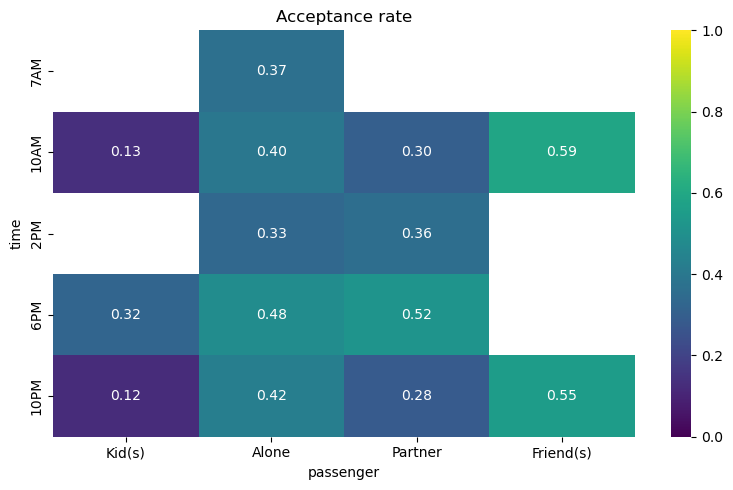

<Axes: title={'center': 'Acceptance rate'}, xlabel='passenger', ylabel='time'>

In [104]:
# Heatmap of all users shown Bar coupons
acceptance_heatmap(bardf)

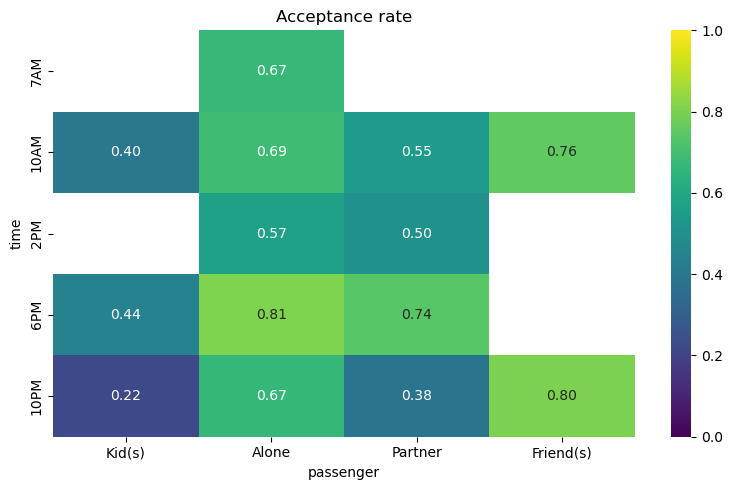

<Axes: title={'center': 'Acceptance rate'}, xlabel='passenger', ylabel='time'>

In [105]:
# Look at the coupon habits for bargoers based on time of day and who is in the car with them
acceptance_heatmap(bardf[bardf['frequentsType'] == 1])

In [106]:
# What portion of users shown Bar Coupons were bar goers
bardf['frequentsType'].value_counts(normalize=True)

frequentsType
0    0.704512
1    0.295488
Name: proportion, dtype: float64

In [107]:
# This shows that a Bar coupons are only really used by bar goers
# This is something that can be improved upon because most people (over 70%) that were shown a bar coupon were not bar goers.
# Bar goers will use a coupon alone in the evening or with a friend, but not with a kid
# With their partner, they are a bit less likely to use a coupon than alone, although in the evening it is still likely.
#
# Does this apply to other types of establishments

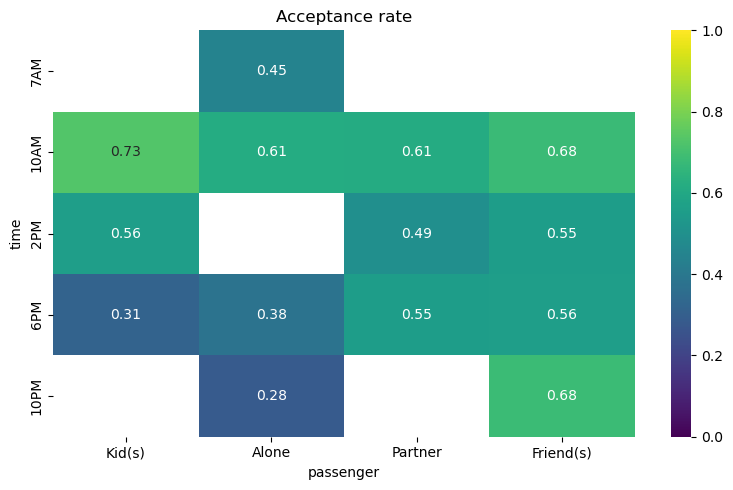

<Axes: title={'center': 'Acceptance rate'}, xlabel='passenger', ylabel='time'>

In [108]:
# All coffee house coupons shown to all users
acceptance_heatmap(chdf)

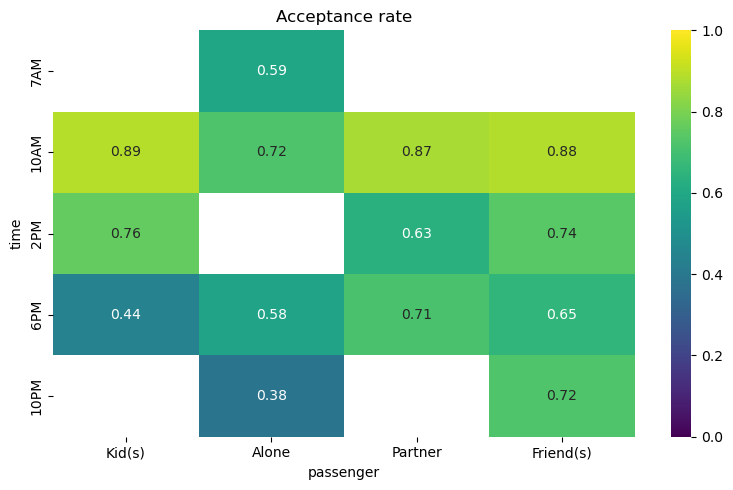

<Axes: title={'center': 'Acceptance rate'}, xlabel='passenger', ylabel='time'>

In [109]:
# Coffee house coupons shown to coffee house goers
acceptance_heatmap(chdf[chdf['frequentsType'] == 1])

In [110]:
# How often were Coffee House coupons shown to people that go to Coffee Houses
chdf['frequentsType'].value_counts(normalize=True)

frequentsType
0    0.519019
1    0.480981
Name: proportion, dtype: float64

In [111]:
# So non-coffee drinkers will rarely use a coupon if they are alone or with kids, but when they are with friends or a partner, they might
# (I suspect this indicates them getting it for their friend or only thinking of it because their friend is there)
#
# Coffee drinkers, however, will be likely to use a coupon, but especially so when with friends or with a partner.
# Curiously, coffee drinkers were even more likely to use a coupon when they had kids with them than when they were alone.

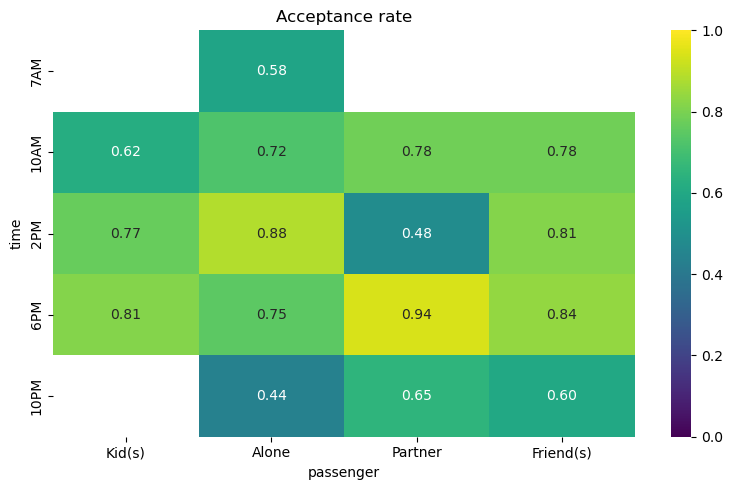

<Axes: title={'center': 'Acceptance rate'}, xlabel='passenger', ylabel='time'>

In [112]:
# All inexpensive restaurant coupons shown to all users
acceptance_heatmap(restlt20df)

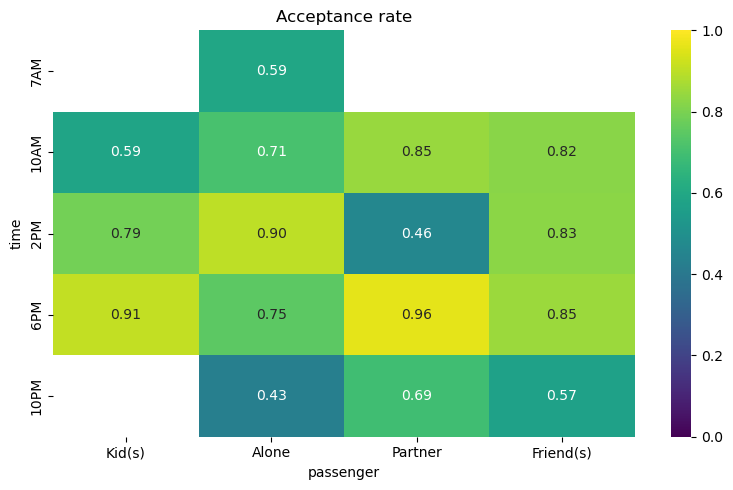

<Axes: title={'center': 'Acceptance rate'}, xlabel='passenger', ylabel='time'>

In [113]:
acceptance_heatmap(restlt20df[restlt20df['frequentsType'] == 1])

In [86]:
restlt20df['frequentsType'].value_counts(normalize=True)

frequentsType
1    0.805815
0    0.194185
Name: proportion, dtype: float64

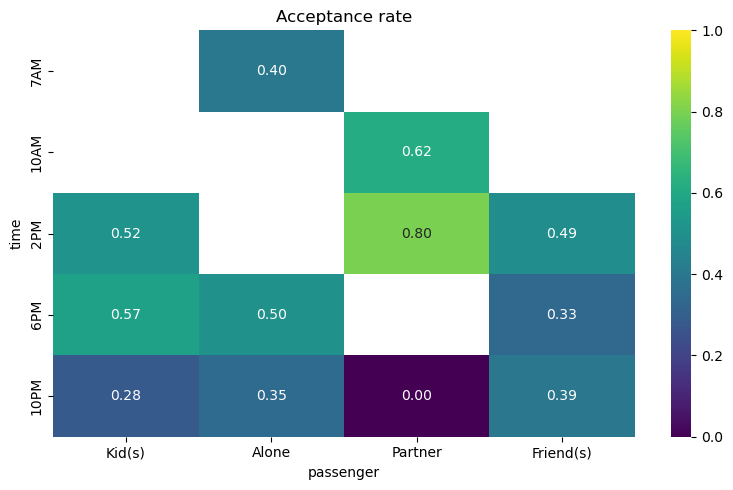

<Axes: title={'center': 'Acceptance rate'}, xlabel='passenger', ylabel='time'>

In [114]:
# All more expensive restaurant coupons shown to all users
acceptance_heatmap(rest2050df)

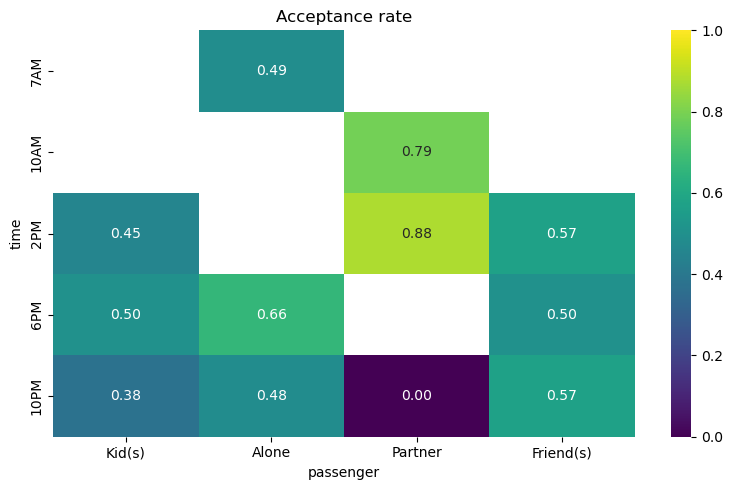

<Axes: title={'center': 'Acceptance rate'}, xlabel='passenger', ylabel='time'>

In [115]:
acceptance_heatmap(rest2050df[rest2050df['frequentsType'] == 1])

In [116]:
rest2050df['frequentsType'].value_counts(normalize=True)

frequentsType
0    0.660858
1    0.339142
Name: proportion, dtype: float64

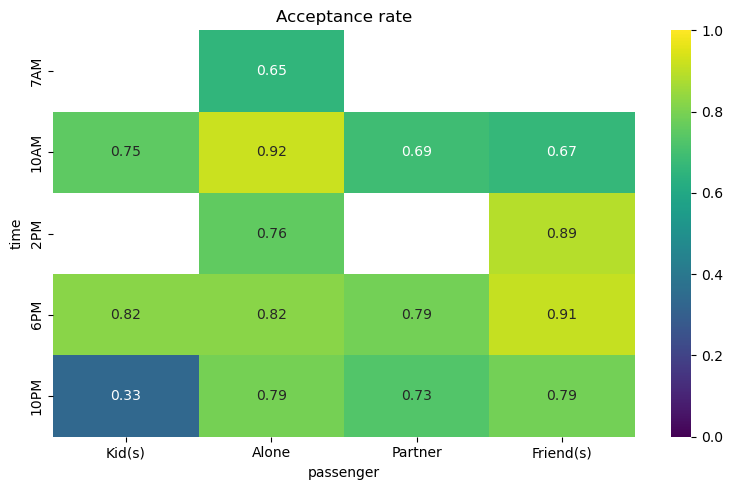

<Axes: title={'center': 'Acceptance rate'}, xlabel='passenger', ylabel='time'>

In [119]:
# All carryout restaurant coupons shown to all users
acceptance_heatmap(carryoutdf)

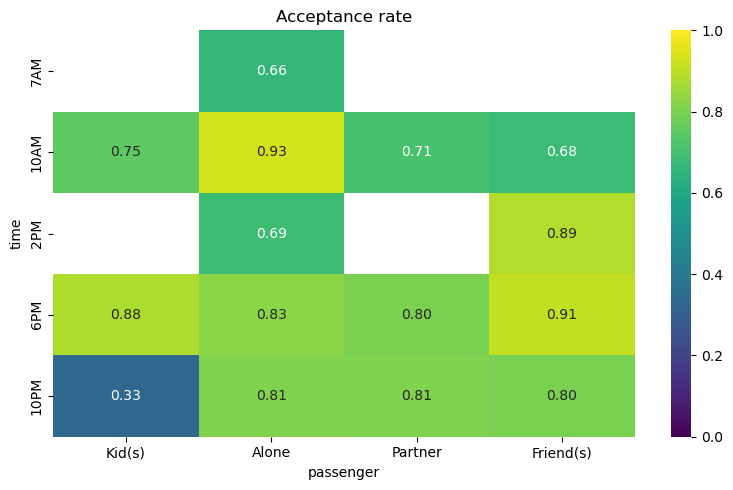

<Axes: title={'center': 'Acceptance rate'}, xlabel='passenger', ylabel='time'>

In [120]:
acceptance_heatmap(carryoutdf[carryoutdf['frequentsType'] == 1])

In [121]:
carryoutdf['frequentsType'].value_counts(normalize=True)

frequentsType
1    0.829921
0    0.170079
Name: proportion, dtype: float64

In [ ]:
# Again this is an example of most users getting the coupon being people who have already been carryout users.